In [1]:
import numpy as np
import numpy as numpy
import cv2
from scipy.fftpack import dct, idct, dctn, idctn
import math
import heapq
import numpy as np
from collections import defaultdict
import pickle
from pympler import asizeof
from functions import pad_array, compress, decompress,set_bitrate,img_set,make_dict,save_file,load_file,dimg_set,send_mc, get_mc, blockshaped,load_file_vid


### image

In [7]:
gray_image = cv2.imread('lk.jpg', cv2.IMREAD_GRAYSCALE)
img = np.asarray(gray_image)
img = pad_array(img)

In [31]:
ori_size = asizeof.asizeof(img)/1000
ori_size

300.744

In [32]:
cv2.imshow('',gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
cv2.imwrite('gray_lk.jpg',gray_image)

True

In [6]:
bitrate_quality = set_bitrate(420,img,0.0001,1,0.0001)

In [33]:
bitrate_quality = 3

In [63]:
bitrate_quality = 1

In [34]:

huffman_codes, encode = compress(img_set(img,bitrate_quality))
dic = make_dict(huffman_codes, encode, img.shape)
dic['quality'] = bitrate_quality
save_file(dic, "com_img")

In [38]:
def img_compress(input_name:str,output_name:str,qunt_level=1.0):
    gray_image = cv2.imread(input_name+'.jpg', cv2.IMREAD_GRAYSCALE)
    img = np.asarray(gray_image)
    img = pad_array(img)
    huffman_codes, encode = compress(img_set(img,qunt_level))
    dic = make_dict(huffman_codes, encode, img.shape)
    dic['quality'] = qunt_level
    save_file(dic,output_name)

In [53]:
def img_compress_bitrate(input_name:str,output_name:str,bit_rate):
    gray_image = cv2.imread(input_name+'.jpg', cv2.IMREAD_GRAYSCALE)
    img = np.asarray(gray_image)
    img = pad_array(img)
    qunt_level = set_bitrate(bit_rate,img,0.0001,200,0.0001)
    huffman_codes, encode = compress(img_set(img,qunt_level))
    dic = make_dict(huffman_codes, encode, img.shape)
    dic['quality'] = qunt_level
    save_file(dic,output_name)

In [54]:
img_compress_bitrate("120","com_120_br",300)

In [39]:
img_compress("120","com_120",3)

In [56]:
def img_decompress(input_name:str,output_name:str):
    code, data, shape, quality = load_file(input_name)
    decom = decompress(data, shape, code)
    output_img = dimg_set(decom,shape,quality)
    result = cv2.normalize(output_img, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    cv2.imwrite(output_name + '.jpg',result)

In [57]:
img_decompress("com_120_br","de_120_br")

In [65]:
com_size = asizeof.asizeof(dic)/1000
com_size

203.552

In [66]:
cr = ori_size/com_size
cr

2.1795708221977677

In [52]:
code, data, shape, quality = load_file("com_img")
decom = decompress(data, shape, code)
output_img = dimg_set(decom,shape,quality)
result = cv2.normalize(output_img, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imwrite('test.jpg',result)

True

In [48]:
cv2.imshow("",output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### video

In [59]:
video = cv2.VideoCapture('10 sec new.mp4')

if not video.isOpened():
    print("Error opening video file")
    exit()

ret, frame = video.read()
frames = []

while ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_array = np.array(frame)
    frames.append(frame_array)
    ret, frame = video.read()
video.release()
frames_array = np.array(frames)
frame_test = frames_array[0:30]

In [36]:
asizeof.asizeof(frames_array)/1000/1000

29.036312000000002

In [ ]:
def vid_compress(self,Vid_name:str,output_name:str,frames=0,quality=1):
    video = cv2.VideoCapture(vid_name)

    if not video.isOpened():
        print("Error opening video file")
        exit()

    ret, frame = video.read()
    frames = []
    count = 1
    while ret:
        count = count+1
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_array = np.array(frame)
        frames.append(frame_array)
        ret, frame = video.read()
    video.release()
    frames_array = np.array(frames)
    if frames = 0:
        frame_test = frames_array[0:count]
    else:
        frame_test = frames_array[0:frames]
    
    first = pad_array(frame_test[0])
    send_dict = {}
    quality = quality
    huffman_codes, encode = compress(img_set(first,quality))
    dic = make_dict(huffman_codes, encode, first.shape)
    dic["frames"] = frame_test.shape[0]
    dic['quality'] = quality
    send_dict = {"frame0" : dic}
    
    for j in range(frame_test.shape[0]-1):
        dic = {}
        current1 = pad_array(frame_test[j+1])
        previous1 = pad_array(frame_test[0])
        mc = get_mc(current1,previous1)
        send =  send_mc(mc)
        pre_block = blockshaped(previous1,8,8)
        recon_img = np.zeros(pre_block.shape)

        for i in range(recon_img.shape[0]):
            recon_img[i] = pre_block[mc[i]]

        recon_img1 = recon_img.reshape(current1.shape)
        residual = current1 - recon_img1
        quality = quality
        huffman_codes, encode = compress(img_set(residual,quality))
        dic = make_dict(huffman_codes, encode, first.shape)
        dic["mv"] = send
        dic['quality'] = quality

        send_dict["frame"+str(j+1)] = dic
        
        save_file(send_dict, output_name)

In [61]:
first = pad_array(frame_test[0])
send_dict = {}
quality = 3
huffman_codes, encode = compress(img_set(first,quality))
dic = make_dict(huffman_codes, encode, first.shape)
dic["frames"] = frame_test.shape[0]
dic['quality'] = quality
send_dict = {"frame0" : dic}



In [5]:
quality

0.5068271713256836

In [62]:
for j in range(frame_test.shape[0]-1):
  dic = {}
  current1 = pad_array(frame_test[j+1])
  previous1 = pad_array(frame_test[0])
  mc = get_mc(current1,previous1)
  send =  send_mc(mc)
  pre_block = blockshaped(previous1,8,8)
  recon_img = np.zeros(pre_block.shape)

  for i in range(recon_img.shape[0]):
      recon_img[i] = pre_block[mc[i]]

  recon_img1 = recon_img.reshape(current1.shape)
  residual = current1 - recon_img1
  quality = 3
  huffman_codes, encode = compress(img_set(residual,quality))
  dic = make_dict(huffman_codes, encode, first.shape)
  dic["mv"] = send
  dic['quality'] = quality

  send_dict["frame"+str(j+1)] = dic
  
  

In [35]:
asizeof.asizeof(send_dict)/1000/1000

83.35433599999999

In [33]:
asizeof.asizeof(frame_test)/asizeof.asizeof(send_dict)

0.3483479491696749

In [63]:
save_file(send_dict, "com_vid_all")

In [ ]:
def vid_decompress(file_name):
    code, data, shape, frames, mv, quality = load_file_vid(file_name)
    decom_vid = np.zeros((frames , shape[0],shape[1]))  #residual
    final = np.zeros((frames , shape[0],shape[1]))      #final
    mv_img = np.zeros((frames-1 , shape[0],shape[1]))   #reconstructed

    for i in range(frames):
    decom = decompress(data[i], shape, code["frame"+str(i)])
    decom_vid[i] = dimg_set(decom,shape,quality[i])
    
    img = blockshaped(decom_vid[0],8,8)

    real_mv = []
    new_mv = mv
    for j in range(len(mv)):
    tem_mv = []
    for k in range(img.shape[0]):
        tem_mv.append((k,k))
    da = np.array(tem_mv)
    for i in range(len(new_mv[j])):
        da[new_mv[j][i][0]][1] = new_mv[j][i][1]
    real_mv.append((da))
    
    for j in range(len(real_mv)):
    recon_img1 = np.zeros(img.shape)
    for i in range(recon_img.shape[0]):
        recon_img1[i] = img[real_mv[j][i][1]]
    mv_img[j] = recon_img1.reshape(decom_vid[0].shape)
    
    final[0] = decom_vid[0]
    for i in range(1,len(real_mv)):
    final[i] = mv_img[i] + decom_vid[i]
    
    return final

In [64]:
code, data, shape, frames, mv, quality = load_file_vid("com_vid_all")

In [ ]:
quality

In [22]:
from matplotlib import pyplot as plt

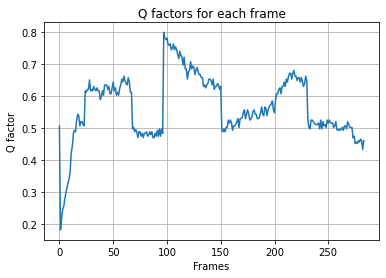

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(quality)
plt.title('Q factors for each frame')
plt.xlabel("Frames")
plt.ylabel('Q factor')
plt.grid()
plt.show()
plt.savefig("qua.png")

In [65]:
decom_vid = np.zeros((frames , shape[0],shape[1]))  #residual
final = np.zeros((frames , shape[0],shape[1]))      #final
mv_img = np.zeros((frames-1 , shape[0],shape[1]))   #reconstructed

for i in range(frames):
  decom = decompress(data[i], shape, code["frame"+str(i)])
  decom_vid[i] = dimg_set(decom,shape,quality[i])
  
img = blockshaped(decom_vid[0],8,8)

real_mv = []
new_mv = mv
for j in range(len(mv)):
  tem_mv = []
  for k in range(img.shape[0]):
    tem_mv.append((k,k))
  da = np.array(tem_mv)
  for i in range(len(new_mv[j])):
    da[new_mv[j][i][0]][1] = new_mv[j][i][1]
  real_mv.append((da))
  
for j in range(len(real_mv)):
  recon_img1 = np.zeros(img.shape)
  for i in range(recon_img.shape[0]):
    recon_img1[i] = img[real_mv[j][i][1]]
  mv_img[j] = recon_img1.reshape(decom_vid[0].shape)
  
final[0] = decom_vid[0]
for i in range(1,len(real_mv)):
  final[i] = mv_img[i] + decom_vid[i]

In [71]:
for i in range(frames):
    cv2.imshow("",final[i])
    cv2.waitKey(30)
cv2.destroyAllWindows()

In [19]:
cv2.imshow("",decom_vid[95])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [133]:
output_filename = 'output_video6.avi'
codec = cv2.VideoWriter_fourcc(*'MJPG')  # You can choose the codec based on the file extension
fps = 30  # Frames per second
frame_size = shape  # Set the width and height of each frame in pixels

# Create the VideoWriter object
video_writer = cv2.VideoWriter(output_filename, codec, fps, frame_size, isColor = False)

for frame in final:
    # Convert the frame to the appropriate format (e.g., uint8)
    frame = np.uint8(frame)

    # Write the frame to the video file
    video_writer.write(frame)

video_writer.release()